# CASO REAL DE NEGOCIO:

## 1 -  Descripción del caso de negocio

La empresa para la que trabajas te ha facilitado un dataset con datos de clientes. Te piden que hagas un análisis de los datos para poder responder a las siguientes preguntas relacionadas con el valor de vida del cliente: ***(CLV - Customer Lifetime Value)***
1. ¿Cuál es el valor de vida del cliente? 8005.0
2. ¿Cuál es el valor de vida del cliente por canal de adquisición?
Agent          7957.709353
Branch         8119.711861
Call Center    8100.085753
Web            7779.788057
3. ¿Cuál es el valor de vida del cliente por producto?
Corporate Auto    7814.409552
Personal Auto     8027.363535
Special Auto      8594.245038
4. ¿Cuál es el valor de vida del cliente por mes de adquisición?
  1    8043.888001
  2    7959.906249
5. ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?
	customer_lifetime_value
Agent          1        7889.862297
               2        8033.794094
Branch         1        8140.937809
               2        8094.762378
Call Center    1        8325.095454
               2        7844.875234
Web            1        7887.042517
               2        7646.174451

Por otro lado quieren poder visualizar los datos de forma que se puedan ver las siguientes relaciones:
6. Valor de vida del cliente vs edad
7. Valor de vida del cliente vs edad y sexo
8. Valor de vida del cliente vs edad y producto
9. Valor de vida del cliente vs edad y canal de adquisición
10. Valor de vida del cliente vs edad, sexo y producto
11. Valor de vida del cliente vs edad, sexo y canal de adquisición

Además de ello, quieren que analices las campañas de marketing que han realizado contestando a las siguientes preguntas:
12. ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
13. ¿Que campaña de marketing ha sido más efectiva?
14. ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
15. ¿Que campaña de marketing ha sido más efectiva por producto?
16. ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

Una vez hayas realizado el añalisis, tendrás que presentar tus respuestas a las preguntas que te han realizado apoyándote en los gráficos que hayas realizado para ello, además de cualquier otro insight que hayas encontrado en el análisis y consideres relevante para el negocio.

## 2 - Descripcion de los datos:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  

## 3 - Tu Análisis

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # para que salgan todas las columnas en el display del df

data=pd.read_csv('Marketing-Customer-Analysis.csv')

data.columns=[e.lower().replace(' ', '_') for e in data.columns] # para que todas las columnas esten en minusculas y con guion bajo

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
# Tu trabajo aquí

In [3]:
df = data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [5]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [6]:
#1. ¿Cuál es el valor de vida del cliente?

clv = data.customer_lifetime_value.mean().round()
clv

8005.0

In [7]:
canal_adq = df['sales_channel'].value_counts()
canal_adq

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [8]:
df[df["sales_channel"] == "Agent"][["sales_channel"]].value_counts()


sales_channel
Agent            3477
dtype: int64

In [9]:
#2. ¿Cuál es el valor de vida del cliente por canal de adquisición?
group = df["customer_lifetime_value"].groupby(df["sales_channel"]).mean()
group


sales_channel
Agent          7957.709353
Branch         8119.711861
Call Center    8100.085753
Web            7779.788057
Name: customer_lifetime_value, dtype: float64

In [10]:
#3. ¿Cuál es el valor de vida del cliente por producto?

clv_producto = pd.DataFrame(df["customer_lifetime_value"].groupby(df["policy_type"]).mean())
clv_producto


,customer_lifetime_value
policy_type,
Corporate Auto,7814.409552
Personal Auto,8027.363535
Special Auto,8594.245038


In [198]:
df['month'] = pd.DatetimeIndex(df['effective_to_date']).month

In [199]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [13]:
#4. ¿Cuál es el valor de vida del cliente por mes de adquisición?
clv_mes = df["customer_lifetime_value"].groupby(df["month"]).mean()
clv_mes

month
1    8043.888001
2    7959.906249
Name: customer_lifetime_value, dtype: float64

In [14]:
#5. ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

clv_mes_canal = pd.DataFrame(df.groupby(['sales_channel', 'month'])['customer_lifetime_value'].mean())
clv_mes_canal

customer_lifetime_value
sales_channel month                         
Agent         1                  7889.862297
              2                  8033.794094
Branch        1                  8140.937809
              2                  8094.762378
Call Center   1                  8325.095454
              2                  7844.875234
Web           1                  7887.042517
              2                  7646.174451

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df.months_since_policy_inception.value_counts()

59    142
61    128
50    125
44    115
3     114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

<Axes: xlabel='months_since_policy_inception', ylabel='customer_lifetime_value'>

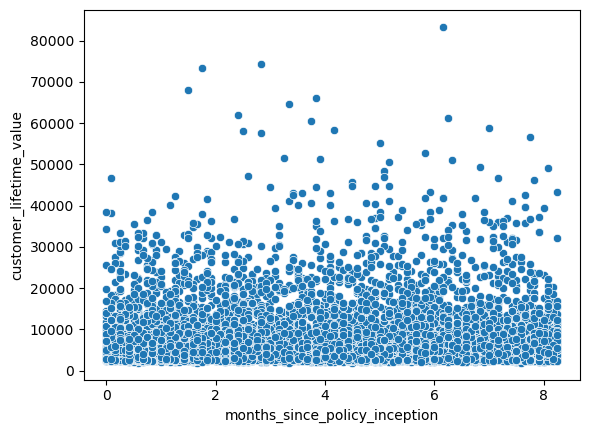

In [17]:
#6. Valor de vida del cliente vs edad
edad = df.months_since_policy_inception/12
clv2 = df.customer_lifetime_value

sns.scatterplot(x=edad, y=clv2, data=df)

<Axes: xlabel='months_since_policy_inception', ylabel='customer_lifetime_value'>

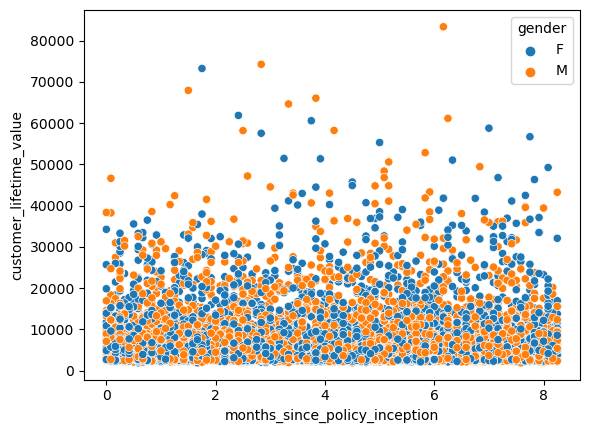

In [18]:
#7. Valor de vida del cliente vs edad y sexo
edad = df.months_since_policy_inception/12
clv3 = df.customer_lifetime_value
genero = df.gender

sns.scatterplot(x=edad, y=clv2, hue=genero, data=df)

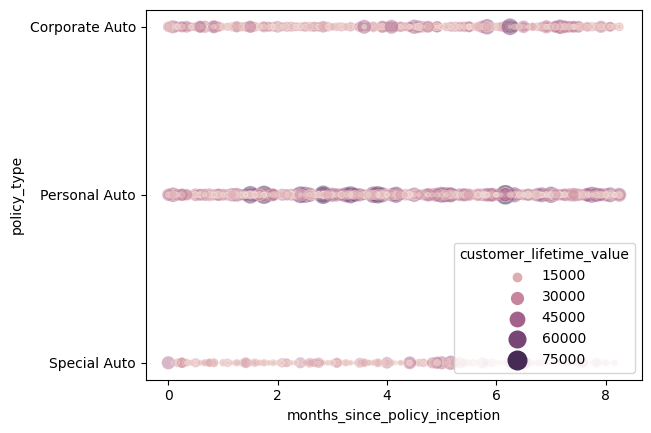

In [19]:
#8. Valor de vida del cliente vs edad y producto
cvl_e_p = df.customer_lifetime_value
edad1 = df.months_since_policy_inception/12
product = df.policy_type

sns.scatterplot(x=edad1, y=product, hue=cvl_e_p, data=df, size=cvl_e_p, sizes=(5,200), alpha=0.5);
#plt.leyen(bbox_to_anchor = ( 1.02 , 1 ), loc = ' superior izquierda ', borderaxespad = 0 )
#sns.catplot(data=df, x=edad1, y=product, hue=cvl_e_p)

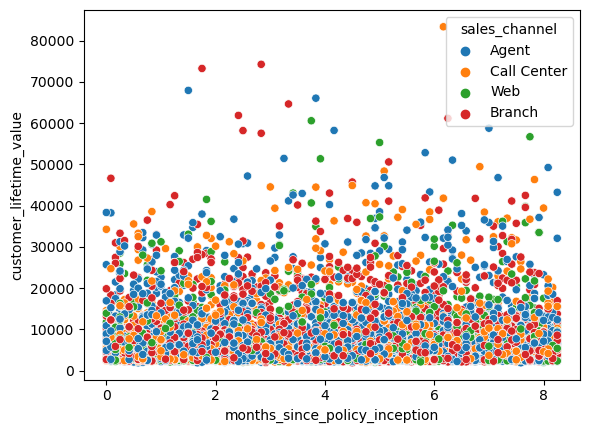

In [20]:
#9. Valor de vida del cliente vs edad y canal de adquisición

cvl_e_p1 = df.customer_lifetime_value
edad2 = df.months_since_policy_inception/12
adqui = df.sales_channel

scatter = sns.scatterplot(x=edad2, y="customer_lifetime_value", data=df, hue=adqui)

In [11]:
df.policy_type.value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

<Axes: xlabel='gender,policy_type'>

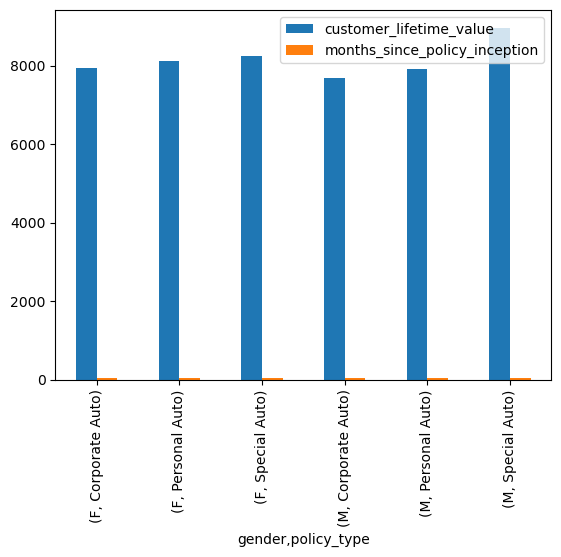

In [282]:
#10. Valor de vida del cliente vs edad, sexo y producto
cvl_e_p2 = df.customer_lifetime_value
edad3 = (df.months_since_policy_inception/12).mean()
genero = df.gender
product = df.policy_type

valor_c = df.groupby(['gender', 'policy_type']).agg({'customer_lifetime_value': "mean", 'months_since_policy_inception':'mean' })
valor_c.round()
valor_c.plot(kind="bar")

<Axes: xlabel='months_since_policy_inception', ylabel='customer_lifetime_value'>

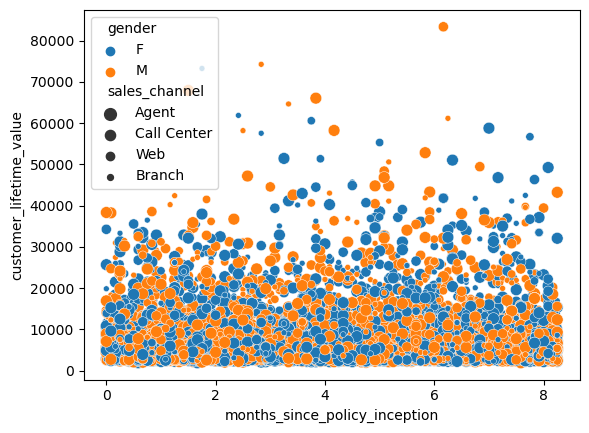

In [25]:
#11. Valor de vida del cliente vs edad, sexo y canal de adquisición

cvl_e_p3 = df.customer_lifetime_value
edad4 = df.months_since_policy_inception/12
genero1 = df.gender
canal = df.sales_channel

sns.scatterplot(x=edad4, y=cvl_e_p3, hue=genero1,data=df, size=canal)

In [ ]:
#12. ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.
#(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...

mk= df['response'].value_counts()
mk

In [45]:
df["customer_lifetime_value"].groupby(df["sales_channel"]).mean()

sales_channel
Agent          7957.709353
Branch         8119.711861
Call Center    8100.085753
Web            7779.788057
Name: customer_lifetime_value, dtype: float64

In [30]:
pd.DataFrame(df[df["sales_channel"] == "Web"][["sales_channel", 'response']].value_counts())


0
sales_channel response      
Web           No        1169
              Yes        156

In [41]:
pd.DataFrame(df[df["sales_channel"] == "Agent"][["sales_channel", 'response']].value_counts())


0
sales_channel response      
Agent         No        2811
              Yes        666

In [42]:
pd.DataFrame(df[df["sales_channel"] == "Branch"][["sales_channel", 'response']].value_counts())


0
sales_channel response      
Branch        No        2273
              Yes        294

In [43]:
pd.DataFrame(df[df["sales_channel"] == "Call Center"][["sales_channel", 'response']].value_counts())


0
sales_channel response      
Call Center   No        1573
              Yes        192

In [74]:
#coverage, sales_channel, state
 
mk = df.groupby(['customer_lifetime_value', "state", "sales_channel", 'coverage', 'response']).agg({"": 'count'})
mk

,,,,,sales_channel
customer_lifetime_value,state,sales_channel,coverage,response,
1898.007675,California,Agent,Basic,No,1
1898.683686,Arizona,Agent,Basic,No,1
1904.000852,California,Agent,Basic,No,1
1918.119700,California,Branch,Basic,No,1
1940.981221,Oregon,Call Center,Basic,No,1
...,...,...,...,...,...
66025.754070,Washington,Agent,Basic,No,1
67907.270500,Oregon,Agent,Premium,No,1
73225.956520,California,Branch,Extended,No,1


<Axes: xlabel='state', ylabel='count'>

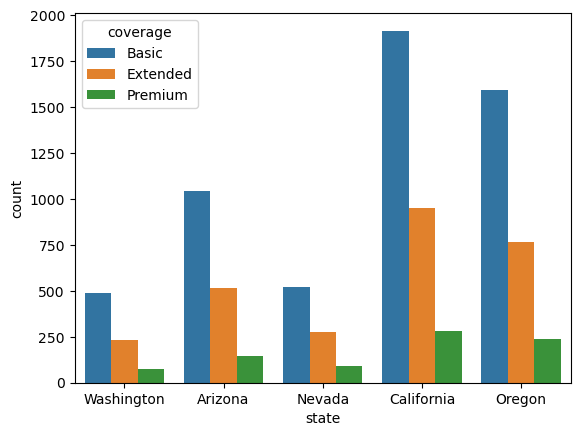

In [135]:
import seaborn as sns
#x=df.groupby(["sales_channel","coverage"]).agg({'state': 'count' })

sns.countplot(x="state", hue="coverage", data=df)


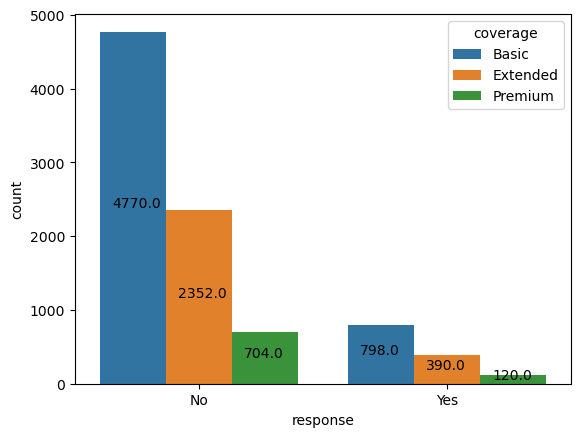

In [297]:
ax = sns.countplot(x=df.response, hue=df.coverage, order=df.response.value_counts().index)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()/2))

<Axes: xlabel='sales_channel'>

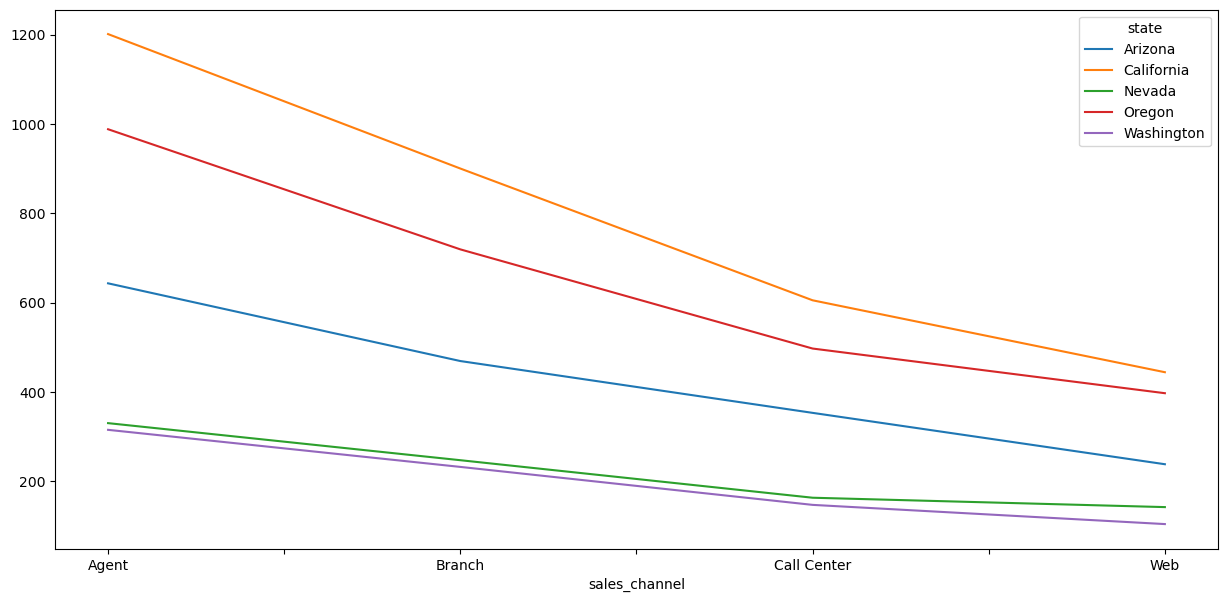

In [137]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(["sales_channel","state"]).count()['coverage'].unstack().plot(ax=ax)

In [299]:
#13. ¿Que campaña de marketing ha sido más efectiva?
mrkt_msr=df.groupby(["sales_channel",'response']).agg({'response': 'count'})
mrkt_msr
#mrkt_msr.number_of_open_complaints.max()

response
sales_channel response          
Agent         No            2811
              Yes            666
Branch        No            2273
              Yes            294
Call Center   No            1573
              Yes            192
Web           No            1169
              Yes            156

array([<Axes: ylabel='response'>], dtype=object)

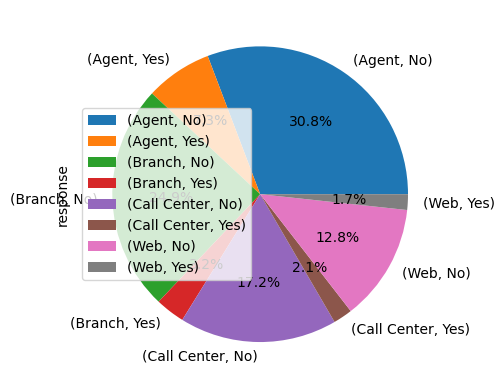

In [300]:
#14. ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
mrkt_msr.plot.pie(autopct="%.1f%%",
                 subplots=True)
# un menor porcentaje representa una mejor efectividad

In [188]:
#15. ¿Que campaña de marketing ha sido más efectiva por producto?

#producto=df.groupby(["sales_channel","policy_type","policy"]).agg({'policy': 'count'})
producto=df.groupby(["sales_channel","policy_type"]).agg({'number_of_open_complaints': 'count'})
#producto
producto.sort_values(by="number_of_open_complaints", ascending=False)

,,number_of_open_complaints
sales_channel,policy_type,
Agent,Personal Auto,2575
Branch,Personal Auto,1906
Call Center,Personal Auto,1329
Web,Personal Auto,978
Agent,Corporate Auto,752
Branch,Corporate Auto,553
Call Center,Corporate Auto,378
Web,Corporate Auto,285
Agent,Special Auto,150


In [217]:
#16. ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?
duracion=df.groupby(["month","sales_channel"]).agg({'month': 'count'})
duracion.sort_values(by="sales_channel", ascending=True)

#df.months_since_policy_inception.value_counts()

,,month
month,sales_channel,
1,Agent,1838
2,Agent,1639
1,Branch,1387
2,Branch,1180
1,Call Center,938
2,Call Center,827
1,Web,735
2,Web,590


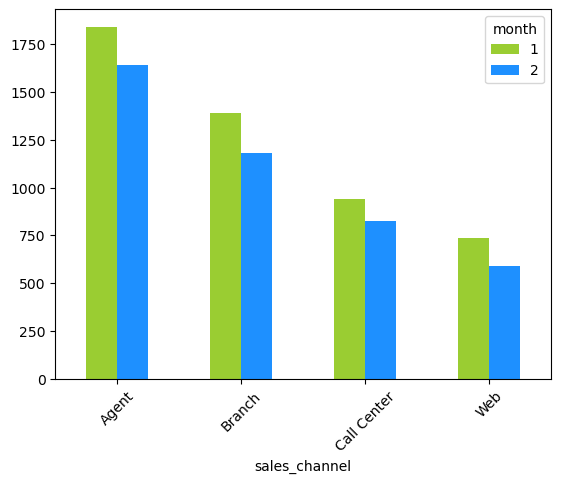

In [234]:
#sns.histplot(x=duracion.month, bins=30, fill=None, kde=True)
#sns.countplot(x="month", hue="sales_channel", data=duracion)
df.groupby(["sales_channel","month"])["month"].count().unstack().plot(kind="bar", color=["yellowgreen", "dodgerblue"])
plt.xticks(rotation=45);
